In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = gpd.read_file('AssignmentData/swimming_pools.shp')

<AxesSubplot:>

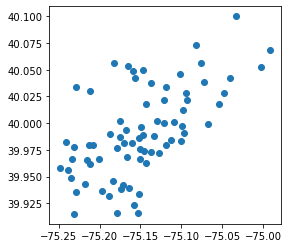

In [4]:
data.plot()

In [5]:
data.head()

,OBJECTID,NAME,PARK_NAME,ADDRESS_91,ZIP_CODE,POOL_TYPE,POOL_STATU,COMMENTS,DATE_INSTA,DATA_SOURC,geometry
0,1,Fox Chase Pool,Fox Chase Recreation Center,7901 RIDGEWAY ST,19111,OUTDOOR,ACTIVE,None,None,Finder; Previous GIS Data,POINT (-75.08232 40.07367)
1,2,Mitchell Pool,Thomas Mitchell Memorial Playground,3600 WHITEHALL LN,19114,OUTDOOR,ACTIVE,None,2012-01-01,Capital 2019; Finder,POINT (-74.99143 40.06830)
2,3,Jardel Pool,Thomas E. Jardel Memorial Field,1400 COTTMAN AVE,19111,OUTDOOR,ACTIVE,None,None,Finder; Previous GIS Data,POINT (-75.07590 40.05629)
3,4,Jacobs Pool,George Jacobs Playground,4500 LINDEN AVE,19136,OUTDOOR,ACTIVE,None,None,Aquatics 2019; Finder,POINT (-75.00284 40.05266)
4,5,Morris Estates Pool,Morris Estate Cultural Center,1610 CHELTEN AVE,19141,OUTDOOR,ACTIVE,Emergency access is from Chelten around the bu...,None,Finder; Administration,POINT (-75.14641 40.04992)


In [8]:
data_n = data[data['NAME'] == 'Jardel Pool']
data_n.head()

,OBJECTID,NAME,PARK_NAME,ADDRESS_91,ZIP_CODE,POOL_TYPE,POOL_STATU,COMMENTS,DATE_INSTA,DATA_SOURC,geometry
2,3,Jardel Pool,Thomas E. Jardel Memorial Field,1400 COTTMAN AVE,19111,OUTDOOR,ACTIVE,None,None,Finder; Previous GIS Data,POINT (-75.07590 40.05629)


In [28]:
data_n.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<ipython-input-29-af185f5ab3f1>:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  data_buffer = data_n.buffer(10)


<AxesSubplot:>

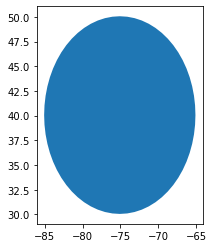

In [29]:
# data_n.to_crs("epsg:4326")
data_buffer = data_n.buffer(10)
data_buffer.plot()

In [36]:
data_n = data_n.to_crs("epsg:3651")

In [37]:
data_n.crs

<Projected CRS: EPSG:3651>
Name: NAD83(NSRS2007) / Pennsylvania South
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Pennsylvania - counties of Adams; Allegheny; Armstrong; Beaver; Bedford; Berks; Blair; Bucks; Butler; Cambria; Chester; Cumberland; Dauphin; Delaware; Fayette; Franklin; Fulton; Greene; Huntingdon; Indiana; Juniata; Lancaster; Lawrence; Lebanon; Lehigh; Mifflin; Montgomery; Northampton; Perry; Philadelphia; Schuylkill; Snyder; Somerset; Washington; Westmoreland; York.
- bounds: (-80.53, 39.71, -74.72, 41.18)
Coordinate Operation:
- name: SPCS83 Pennsylvania South zone (meter)
- method: Lambert Conic Conformal (2SP)
Datum: NAD83 (National Spatial Reference System 2007)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [38]:
data_n.head()

,OBJECTID,NAME,PARK_NAME,ADDRESS_91,ZIP_CODE,POOL_TYPE,POOL_STATU,COMMENTS,DATE_INSTA,DATA_SOURC,geometry
2,3,Jardel Pool,Thomas E. Jardel Memorial Field,1400 COTTMAN AVE,19111,OUTDOOR,ACTIVE,None,None,Finder; Previous GIS Data,POINT (828125.291 83727.797)


In [39]:
data_buffer = data_n.buffer(5000)

<AxesSubplot:>

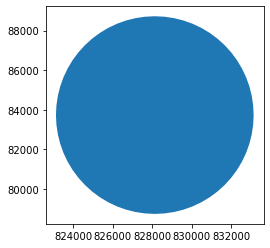

In [40]:
data_buffer.plot()

# Spatial join

In [41]:
incident_data = gpd.read_file("incidents_clean.shp")

In [42]:
incident_data.head()

,objectid,dc_dist,psa,dispatch_d,dispatch_1,dispatch_t,hour_,dc_key,location_b,ucr_genera,text_gener,point_x,point_y,lat,lng,geometry
0,129,9,2,25/03/2020 18:32,25/03/2020,18:32:00,18,2.020090e+11,1400 BLOCK SPRING GARDEN ST,600,Theft from Vehicle,-75.161446,39.962334,39.962334,-75.161446,POINT (-75.16145 39.96233)
1,41,77,A,08/03/2020 19:08,08/03/2020,19:08:00,19,2.020770e+11,0 BLOCK PIA WAY,600,Thefts,-75.230706,39.883881,39.883881,-75.230706,POINT (-75.23071 39.88388)
2,42,77,A,15/03/2020 18:41,15/03/2020,18:41:00,18,2.020770e+11,0 BLOCK PIA WAY,600,Thefts,-75.230706,39.883881,39.883881,-75.230706,POINT (-75.23071 39.88388)
3,43,77,A,18/03/2020 08:17,18/03/2020,08:17:00,8,2.020770e+11,0 BLOCK PIA WAY,600,Thefts,-75.230706,39.883881,39.883881,-75.230706,POINT (-75.23071 39.88388)
4,44,77,A,03/04/2020 15:32,03/04/2020,15:32:33,15,2.020770e+11,0 BLOCK PIA WAY,600,Thefts,-75.230706,39.883881,39.883881,-75.230706,POINT (-75.23071 39.88388)


In [44]:
neigh_data = gpd.read_file("AssignmentData/Neighborhoods_Philadelphia/Neighborhoods_Philadelphia.shp")

In [131]:
neigh_data.head()

,NAME,LISTNAME,MAPNAME,Shape_Leng,Shape_Area,geometry
0,BRIDESBURG,Bridesburg,Bridesburg,27814.546521,4.458626e+07,"POLYGON ((2719789.837 256235.538, 2719814.855 ..."
1,BUSTLETON,Bustleton,Bustleton,48868.458365,1.140504e+08,"POLYGON ((2733378.171 289259.945, 2732818.985 ..."
2,CEDARBROOK,Cedarbrook,Cedarbrook,20021.415802,2.487174e+07,"POLYGON ((2685267.950 279747.336, 2685272.265 ..."
3,CHESTNUT_HILL,Chestnut Hill,Chestnut Hill,56394.297195,7.966498e+07,"POLYGON ((2678490.151 284400.400, 2678518.732 ..."
4,EAST_FALLS,East Falls,East Falls,27400.776417,4.057689e+07,"POLYGON ((2686769.727 263625.367, 2686921.108 ..."


In [46]:
neigh_data.crs

<Projected CRS: EPSG:2272>
Name: NAD83 / Pennsylvania South (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - Pennsylvania - counties of Adams; Allegheny; Armstrong; Beaver; Bedford; Berks; Blair; Bucks; Butler; Cambria; Chester; Cumberland; Dauphin; Delaware; Fayette; Franklin; Fulton; Greene; Huntingdon; Indiana; Juniata; Lancaster; Lawrence; Lebanon; Lehigh; Mifflin; Montgomery; Northampton; Perry; Philadelphia; Schuylkill; Snyder; Somerset; Washington; Westmoreland; York.
- bounds: (-80.53, 39.71, -74.72, 41.18)
Coordinate Operation:
- name: SPCS83 Pennsylvania South zone (US survey foot)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [47]:
incident_data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [48]:
incident_data = incident_data.to_crs("2272")

In [49]:
incident_data.crs

<Projected CRS: EPSG:2272>
Name: NAD83 / Pennsylvania South (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - Pennsylvania - counties of Adams; Allegheny; Armstrong; Beaver; Bedford; Berks; Blair; Bucks; Butler; Cambria; Chester; Cumberland; Dauphin; Delaware; Fayette; Franklin; Fulton; Greene; Huntingdon; Indiana; Juniata; Lancaster; Lawrence; Lebanon; Lehigh; Mifflin; Montgomery; Northampton; Perry; Philadelphia; Schuylkill; Snyder; Somerset; Washington; Westmoreland; York.
- bounds: (-80.53, 39.71, -74.72, 41.18)
Coordinate Operation:
- name: SPCS83 Pennsylvania South zone (US survey foot)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

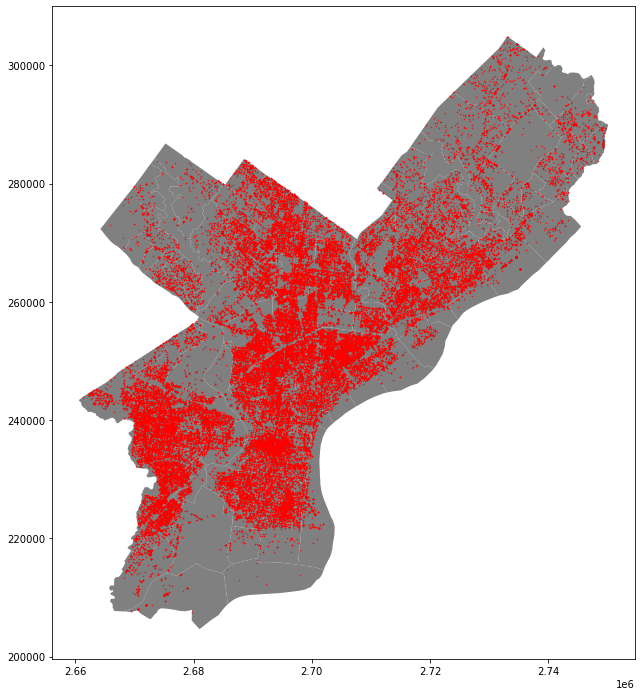

In [56]:
fig,ax = plt.subplots(figsize = (12,12))
neigh_data.plot(ax = ax, color='gray')
incident_data.plot(ax=ax, markersize=0.2, color='red')

In [58]:
data_join = gpd.sjoin(incident_data, neigh_data, how = 'inner', op='within')

C:\Users\padidar\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [61]:
data_join.head(3)

,objectid,dc_dist,psa,dispatch_d,dispatch_1,dispatch_t,hour_,dc_key,location_b,ucr_genera,...,point_y,lat,lng,geometry,index_right,NAME,LISTNAME,MAPNAME,Shape_Leng,Shape_Area
0,129,9,2,25/03/2020 18:32,25/03/2020,18:32:00,18,2.020090e+11,1400 BLOCK SPRING GARDEN ST,600,...,39.962334,39.962334,-75.161446,POINT (2694007.871 239769.488),97,SPRING_GARDEN,Spring Garden,Spring Garden,13574.806234,6.775876e+06
126,4224,9,3,03/01/2020 13:08,03/01/2020,13:08:00,13,2.020090e+11,2500 BLOCK PENNSYLVANIA AVE,600,...,39.966631,39.966631,-75.178832,POINT (2689090.646 241191.975),97,SPRING_GARDEN,Spring Garden,Spring Garden,13574.806234,6.775876e+06
141,8977,9,3,09/01/2020 19:57,09/01/2020,19:57:00,19,2.020090e+11,2200 BLOCK FAIRMOUNT AVE,600,...,39.967146,39.967146,-75.175316,POINT (2690070.500 241408.285),97,SPRING_GARDEN,Spring Garden,Spring Garden,13574.806234,6.775876e+06


In [133]:
data_groupby = data_join.groupby('NAME')
result = data_groupby.size()

In [134]:
result = result.to_frame().reset_index()
result.columns = ['NAME', "Counts"]

In [135]:
result.head()

,NAME,Counts
0,ACADEMY_GARDENS,81
1,AIRPORT,162
2,ALLEGHENY_WEST,923
3,ANDORRA,56
4,ASTON_WOODBRIDGE,74


In [137]:
result[result["NAME"]== "BREWERYTOWN"]

,NAME,Counts
8,BREWERYTOWN,451


In [138]:
result[result["Counts"]==result["Counts"].min()]

,NAME,Counts
80,MECHANICSVILLE,3


In [139]:
result[result["Counts"]==result["Counts"].max()]

,NAME,Counts
135,UPPER_KENSINGTON,2225


In [140]:
neigh_data_merge = neigh_data.merge(result, on="NAME", how="outer")

In [141]:
neigh_data_merge.head()

,NAME,LISTNAME,MAPNAME,Shape_Leng,Shape_Area,geometry,Counts
0,BRIDESBURG,Bridesburg,Bridesburg,27814.546521,4.458626e+07,"POLYGON ((2719789.837 256235.538, 2719814.855 ...",142
1,BUSTLETON,Bustleton,Bustleton,48868.458365,1.140504e+08,"POLYGON ((2733378.171 289259.945, 2732818.985 ...",413
2,CEDARBROOK,Cedarbrook,Cedarbrook,20021.415802,2.487174e+07,"POLYGON ((2685267.950 279747.336, 2685272.265 ...",281
3,CHESTNUT_HILL,Chestnut Hill,Chestnut Hill,56394.297195,7.966498e+07,"POLYGON ((2678490.151 284400.400, 2678518.732 ...",134
4,EAST_FALLS,East Falls,East Falls,27400.776417,4.057689e+07,"POLYGON ((2686769.727 263625.367, 2686921.108 ...",282


In [145]:
type(neigh_data_merge)

geopandas.geodataframe.GeoDataFrame

In [147]:
neigh_data_merge.to_file("AssignmentData/Output/neigh-Geojson.geojson", driver='GeoJSON')

<AxesSubplot:>

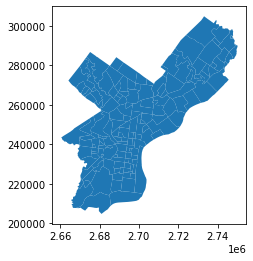

In [148]:
gpd.read_file("AssignmentData/Output/neigh-Geojson.geojson").plot()